In [1]:
#-*- coding: utf-8 -*-

In [2]:
from matplotlib import rcParams
import matplotlib.pyplot as plt
import numpy as np
np.seterr(all='ignore')
rcParams['figure.figsize'] = (14, 6)

#import tushare as ts 
#ts.get_today_all() #实时数据获取！！！

from funcat import * #FUNCAT的同花顺/通达信指标模块：和：&，或：|，其他基本相同。可以使用指标选股！！！
from pytdx import * #通达信数据更新模块到QUANTAXIS的mongoDB
from tushare import * #TUSHARE数据连接更新。
from rqalpha import * #RQALPHA本地数据连接，通过 rqalpha update_bundle 8点后更新全部数据库
import time
import datetime

n1 = (time.strftime("20%y-%m-%d"))## 20yy-mm-dd格式，输出当日日期
print ("读取当日时间格式n1",n1) #当日时间格式：yyyy-mm-dd
n2 = (time.strftime("20%y%m%d"))## 20yymmdd格式，输出当日日期
print ("读取当日时间格式n2",n2) #当日时间格式：yyyymmdd
def getYesterday(): 
    today=datetime.date.today() 
    oneday=datetime.timedelta(days=1) 
    yesterday=today-oneday  
    return yesterday
n3 = (getYesterday())# 输出前1天日期
print ("读取前一日时间格式n3",n3) #前日时间格式：yyyy-mm-dd
i = datetime.datetime.now()#当前日期
n4 = ("%s%s%s" % (i.year, i.month, i.day) )
print ("读取当日时间格式n4",n4) #当日时间格式：yyyymmdd
n5 = ("%s" % i.isoformat() )
print ("读取当日时间格式n5",n5) #当日时间格式：yyyy-mm-dd:...
n8="20180205"#开始时间
print ("手动设定选股开始时间格式n8",n8)
n9="20180205"#结束时间
print ("手动设定选股结束时间格式n9",n9)
n10="20080101"#设定起始时间
print ("手动设定数据更新设定起始时间格式n10",n10)

x1="000001"
print ("设定股票代码",x1)

from funcat.data.tushare_backend import TushareDataBackend
from funcat.data.rqalpha_data_backend import RQAlphaDataBackend
backend = "tushare"
if backend == "rqalpha":
    set_data_backend(RQAlphaDataBackend("~/.rqalpha/bundle"))
elif backend == "tushare":
    set_data_backend(TushareDataBackend())
set_start_date(n10)
S(x1)  # 设置当前关注股票
T(n3)   # 设置当前观察日期 n3=实时时间减一天日期

print ("打印 开盘 最高 最低 收盘 成交量",O, H, L, C, V)  # 打印 Open High Low Close
print ("当天涨幅",C / C[1] - 1)  # 当天涨幅
print ("打印60日均线",MA(C, 60))  # 打印60日均线
print ("判断收盘价是否大于60日均线",C > MA(C, 60))  # 判断收盘价是否大于60日均线
print ("30日最高价",HHV(H, 30))  # 30日最高价
print ("最近30日，收盘价 Close 大于60日均线的天数",COUNT(C > MA(C, 60), 30))  # 最近30日，收盘价 Close 大于60日均线的天数
print ("10日均线上穿",CROSS(MA(C, 10), MA(C, 20)))  # 10日均线上穿
print ("最近10天收阳线的天数",COUNT(C > O, 10))  # 最近10天收阳线的天数
print ("最近60天K线实体的最高价",HHV(MAX(O, C), 60))  # 最近60天K线实体的最高价
print ("5日均线上穿10日均线",CROSS(MA(C, 5), MA(C, 10)))  # 5日均线上穿10日均线


FormulaException: only size-1 arrays can be converted to Python scalars

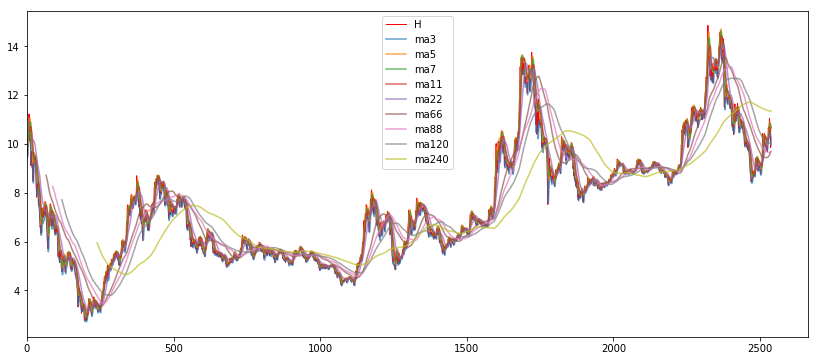

72.64277166470077 78.70252852323374 60.523257947634846


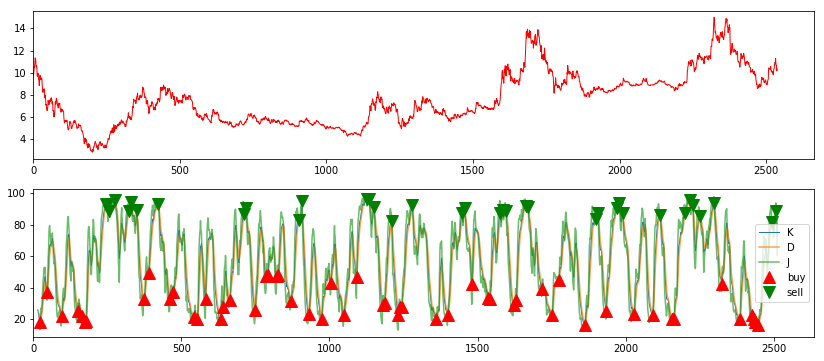

0.7536000000000023 0.6877600000000038


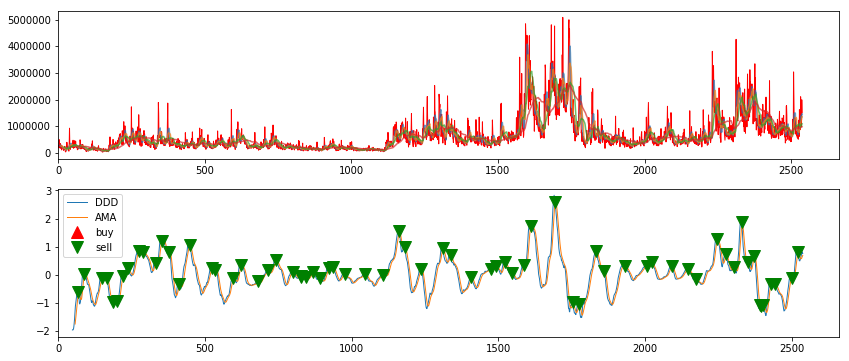

40.76540139097178 -48.257454434532825 -62.74883211333817


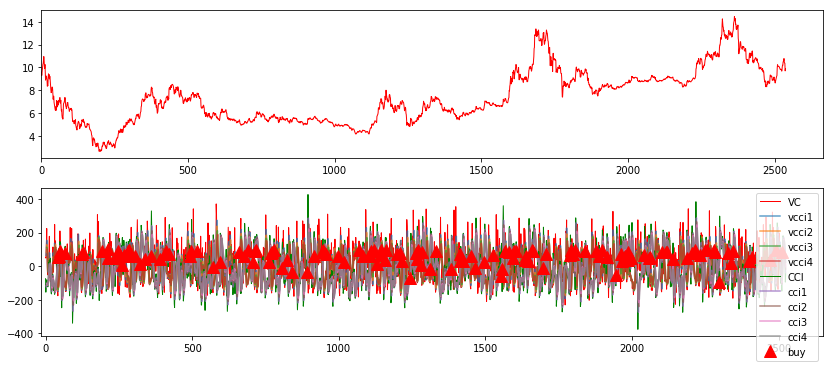

In [2]:
ax = plt.subplot()
#buy_signal = CROSS(ma1, ma7)
#sell_signal = CROSS(ma7, ma1)
plt.plot(C.series, label="H", linewidth=1,color="red")
plt.plot(MA(L,3).series, label="ma3", alpha=0.7)
plt.plot(MA(H,5).series, label="ma5", alpha=0.7)
plt.plot(MA(H,7).series, label="ma7", alpha=0.7)
plt.plot(MA(H,11).series, label="ma11", alpha=0.7)
plt.plot(MA(H,22).series, label="ma22", alpha=0.7)
plt.plot(MA(H,66).series, label="ma66", alpha=0.7)
plt.plot(MA(H,88).series, label="ma88", alpha=0.7)
plt.plot(MA(H,120).series, label="ma120", alpha=0.7)
plt.plot(MA(H,240).series, label="ma240", alpha=0.7)
ax.set_xlim(0)
#plt.plot(np.where(buy_signal.series)[0], C.series[np.where(buy_signal.series)[0]], "^", label="buy", markersize=12, color="red")
#plt.plot(np.where(sell_signal.series)[0], C.series[np.where(sell_signal.series)[0]], "v", label="sell", markersize=12, color="green")
plt.legend(loc="best")
plt.show()
#当前股票价格均线+KDJ显示图及买卖
RSV = (HHV(H,1)-LLV(L,27))/(HHV(H,27)-LLV(L,27))*100
K = EMA(RSV, (9 * 2 - 1))
D = EMA(K, (3 * 2 - 1))
J = K * 3 - D * 2
print(K, D, J)
f, (ax1, ax2,) = plt.subplots(2, 1)
ax1.plot(H.series, label="H", linewidth=1,color="red")
#ax1.plot(MA(V, 7).series, label="ma7", alpha=0.7)
#ax1.plot(MA(V, 11).series, label="ma11", alpha=0.7)
#ax1.plot(MA(V, 22).series, label="ma22", alpha=0.7)
#ax1.plot(MA(V, 66).series, label="ma66", alpha=0.7)
ax1.set_xlim(0)
ax2.plot(K.series, label="K", linewidth=1)
ax2.plot(D.series, label="D", alpha=0.7)
ax2.plot(J.series, label="J", alpha=0.7)
ax2.set_xlim(0)
#buy_signal = CROSS(J, K)
#sell_signal = CROSS(K, J)
buy_signal = (CROSS(IF(D<50,J,D),D) and CROSS(IF(D<50,K,J),D)) #CROSS(J, K)
sell_signal = (CROSS(D,IF(D>80,J,D)) and CROSS(D,IF(D>80,K,J))) #CROSS(K, J)
plt.plot(np.where(buy_signal.series)[0], K.series[np.where(buy_signal.series)[0]], "^", label="buy", markersize=12, color="red")
plt.plot(np.where(sell_signal.series)[0], J.series[np.where(sell_signal.series)[0]], "v", label="sell", markersize=12, color="green")
plt.legend(loc="best")
plt.show()
DDD = MA(CLOSE, 10) - MA(CLOSE, 50)#当前股票成交量均线+DMA指标+买卖
AMA = MA(DDD, 10)#又叫平行线差指标，是目前股市分析技术指标中的一种中短期指标，它常用于大盘指数和个股的研判。
print(DDD, AMA)
f, (ax1, ax2) = plt.subplots(2, 1)
ax1.plot(V.series, label="V", linewidth=1,color="red")
ax1.plot(MA(V, 7).series, label="ma7", alpha=0.7)
ax1.plot(MA(V, 11).series, label="ma11", alpha=0.7)
ax1.plot(MA(V, 22).series, label="ma22", alpha=0.7)
ax1.plot(MA(V, 66).series, label="ma66", alpha=0.7)
ax1.set_xlim(0)
ax2.plot(DDD.series, label="DDD", linewidth=1)
ax2.plot(AMA.series, label="AMA", linewidth=1)
ax2.set_xlim(0)
#buy_signal = CROSS(DDD, AMA)
#sell_signal = CROSS(AMA, DDD)
buy_signal = CROSS(IF(DDD<-10,DDD,AMA),AMA) 
sell_signal = CROSS(AMA, DDD)#CROSS(IF(DDD>70,DDD,DDD),DDD) 
plt.plot(np.where(buy_signal.series)[0], AMA.series[np.where(buy_signal.series)[0]], "^", label="buy", markersize=12, color="red")
plt.plot(np.where(sell_signal.series)[0], DDD.series[np.where(sell_signal.series)[0]], "v", label="sell", markersize=12, color="green")
plt.legend(loc="best")
plt.show()
def AVEDEV(value,N):#CCI指标 方差函数模块
    mean = value/N
    for i in range(1,N):
        mean += REF(value,i)/N
    sum_ = ABS(value-mean)
    for i in range(1,N):
        sum_ += ABS(REF(value,i)-mean)    
    return sum_/N
TYP = (H+L+C)/3
CCI = (TYP-MA(TYP,14))/(0.015*AVEDEV(TYP,14))
VCCI = (V-MA(V,14))/(0.015*AVEDEV(V,14))
VC = ((CCI+VCCI)-MA((CCI+VCCI),14))/(0.015*AVEDEV((CCI+VCCI),14))
VV= VC+CCI
print (VCCI,CCI,VC)
f, (ax1,ax2) = plt.subplots(2,1)
ax1.plot(L.series, label="L", linewidth=1,color="red")
#ax1.plot(MA(L, 7).series, label="ma7", alpha=0.7)
#ax1.plot(MA(H, 11).series, label="ma11", alpha=0.7)
#ax1.plot(MA(H, 22).series, label="ma22", alpha=0.7)
#ax1.plot(MA(H, 66).series, label="ma66", alpha=0.7)
ax1.set_xlim(0)
ax2.plot(VC.series, label="VC",linewidth=1,color="red")
ax2.plot(MA(VC,3).series, label="vcci1", alpha=0.7)
ax2.plot(MA(VC, 4).series, label="vcci2", alpha=0.7)
ax2.plot(MA(VC, 5).series, label="vcci3", alpha=0.7)
ax2.plot(MA(VC, 6).series, label="vcci4", alpha=0.7)
ax2.plot(CCI.series, label="CCI",linewidth=1, color="green")
ax2.plot(MA(CCI, 3).series, label="cci1", alpha=0.7)
ax2.plot(MA(CCI, 4).series, label="cci2", alpha=0.7)
ax2.plot(MA(CCI, 5).series, label="cci3", alpha=0.7)
ax2.plot(MA(CCI, 6).series, label="cci4", alpha=0.7)
ax2.set_xlim(-14)
N1=101
N2=-101
N3=101
buy_signal = CROSS(CCI or VC,N1 or N2)
sell_signal = CROSS(CCI+VC,N1+N2)
plt.plot(np.where(buy_signal.series)[0], CCI.series[np.where(buy_signal.series)[0]], "^", label="buy", markersize=12, color="red")
#plt.plot(np.where(sell_signal.series)[0], CCI.series[np.where(sell_signal.series)[0]], "v", label="sell", markersize=12, color="green")
plt.legend(loc="best")
plt.show()